# Opencv Machine Learning

## KNN

### Understanding KNN
KNN is one of the simplest of classification algorithms available for supervised learning. The idea is to search for closest match of the test data in feature space. The closest match is found by calculating the distance between the test data and each training data. The distance can be Euclidean, Manhattan, Minkowski or Hamming distance. The most popular one is Euclidean distance. The distance is calculated as follows:

$$d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$

where $x$ and $y$ are two feature vectors and $n$ is the number of features.

To explain it more clearly, let's take an example. Suppose we have a dataset of fruits with two features: weight and color. The weight is in grams and color is encoded as 0 for red and 1 for yellow. The dataset is as follows:

| Weight (grams) | Color |
|----------------|-------|
| 150            | 0     |
| 170            | 0     |
| 140            | 0     |
| 130            | 1     |
| 180            | 1     |
| 160            | 1     |

Now, we want to classify a fruit with weight 145 grams and color 0. We will calculate the distance of this fruit from each of the fruits in the dataset. The distance is calculated as follows:

| Weight (grams) | Color | Distance |
|----------------|-------|----------|
| 150            | 0     | 5        |
| 170            | 0     | 25       |
| 140            | 0     | 5        |
| 130            | 1     | 15       |
| 180            | 1     | 35       |
| 160            | 1     | 15       |

Now, we will sort the distances in ascending order and select the top k distances. Suppose we select k = 3. The top 3 distances are 5, 5 and 15. Now, we will check the labels of the corresponding fruits. The first two fruits have label 0 and the third fruit has label 1. We will select the label which is most frequent in the top k distances. In this case, the label 0 is most frequent. So, we will classify the fruit as red.

### KNN in OpenCV
We will do a simple example to demonstrate KNN, with two families (classes), just like the example above.

So here, we label the Red family as Class-0 and Yellow family as Class-1. We generate 25 neighbours or 25 training data, and label them either Class-0 or Class-1. We can do this with the help of numpy.random.randint(). Then we plot them with matplotlib. The result looks like this:



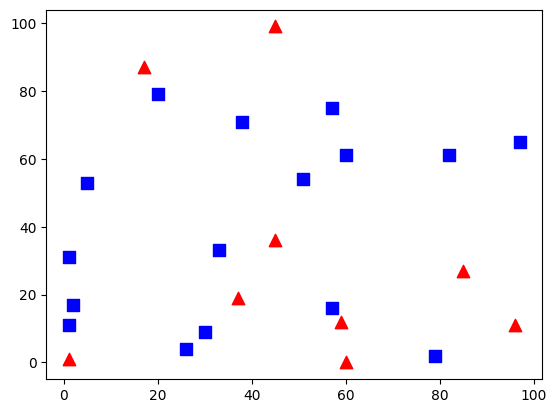

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)

# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# Take Red families and plot them
red = trainData[responses.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# Take Blue families and plot them
blue = trainData[responses.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

plt.show()

Since we are using number generator, we will get different result everytime we run the code. 

Next initiate the kNN algorithm and pass the trainData and responses to train the kNN. (Underneath the hood, it constructs a search tree: see the Additional Resources section below for more information on this.)

Then we will bring one new-comer and classify him as belonging to a family with the help of kNN in OpenCV. Before running kNN, we need to know something about our test data (data of new comers). Our data should be a floating point array with size numberoftestdata×numberoffeatures. Then we find the nearest neighbours of the new-comer. We can specify k: how many neighbours we want. (Here we used 3.) It returns:

- The label given to the new-comer depending upon the kNN theory we saw earlier. If you want the Nearest Neighbour algorithm, just specify k=1.
- The labels of the k-Nearest Neighbours.  
- The corresponding distances from the new-comer to each nearest neighbour.  
 
So let's see how it works. The new-comer is marked in green.

result:  [[1.]]
neighbours:  [[1. 1. 1.]]
distance:  [[ 80.  85. 173.]]


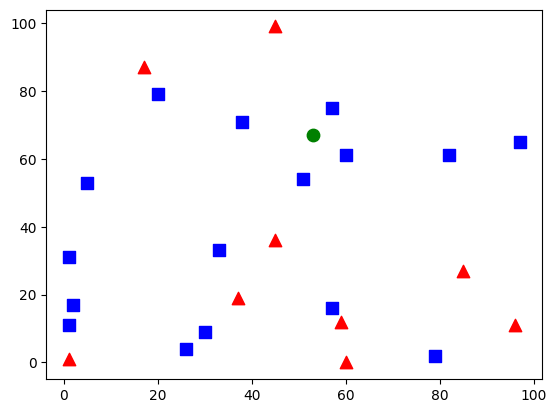

In [4]:
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

print("result: ", results)
print("neighbours: ", neighbours)
print("distance: ", dist)

plt.show()

The result I got is:

```
result:  [[1.]]
neighbours:  [[1. 1. 1.]]
distance:  [[ 80.  85. 173.]]

```

It says the new-comer belongs to Class-1. It also lists the labels of the three nearest neighbours and their distances to the new-comer.

If you have multipile new-comers (test data), you can just pass them as an array. The result will be a corresponding array of results.

In [6]:
# 10 new comers
newcomers = np.random.randint(0, 100, (10, 2)).astype(np.float32)
ret, results, neighbours, dist = knn.findNearest(newcomers, 3)

print("result: ", results)
print("neighbours: ", neighbours)
print("distance: ", dist)

result:  [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
neighbours:  [[0. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
distance:  [[1.160e+02 1.930e+02 3.880e+02]
 [4.000e+00 1.700e+01 1.970e+02]
 [1.300e+02 3.460e+02 4.420e+02]
 [1.277e+03 1.417e+03 1.460e+03]
 [2.320e+02 4.450e+02 5.200e+02]
 [1.000e+01 8.500e+01 1.850e+02]
 [1.300e+01 6.500e+01 3.240e+02]
 [1.040e+03 1.417e+03 1.780e+03]
 [1.690e+02 2.290e+02 2.900e+02]
 [1.000e+00 3.370e+02 3.560e+02]]


result:  [[2.]]
neighbours:  [[2. 2. 3. 3. 2. 3.]]
distance:  [[  2.  26. 106. 157. 170. 205.]]


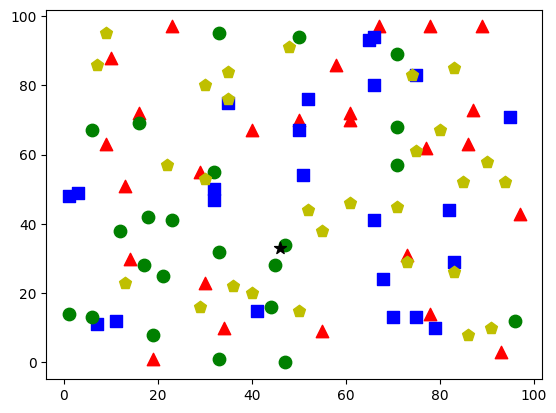

In [10]:
# Feature set containing (x,y) values of 100 known/training data
trainData = np.random.randint(0, 100, (100, 2)).astype(np.float32)

# Labels each one either Red or Blue or Green or Yellow with numbers 0, 1, 2, 3
responses = np.random.randint(0, 4, (100, 1)).astype(np.float32)

# Take Red families and plot them
red = trainData[responses.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

# Take Blue families and plot them
blue = trainData[responses.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# Take Green families and plot them
green = trainData[responses.ravel() == 2]
plt.scatter(green[:, 0], green[:, 1], 80, 'g', 'o')

# Take Yellow families and plot them
yellow = trainData[responses.ravel() == 3]
plt.scatter(yellow[:, 0], yellow[:, 1], 80, 'y', 'p')


newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'k', '*')

knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 6)

print("result: ", results)
print("neighbours: ", neighbours)
print("distance: ", dist)

plt.show()

## OCR of Hand-written Data using kNN

### Goal

In this section, we will build a basic OCR application for handwritten digits from scratch. The goal of this application is to take hand-written digits as input, process the digits, train the digits using kNN algorithm and then give the output.

### OCR of Hand-written Digit

Our goal is to build an application which can read handwritten digits. For example, if you write a digit on paper, our application should tell you which digit you have written. For this, we need some data to train our classifier. OpenCV comes with an image digits.png (in the folder opencv/samples/data/) which has 5000 handwritten digits (500 for each digit). Each digit is a 20x20 image. So our first step is to split this image into 5000 different digits. For each digit, we flatten it into a single row with 400 pixels. That is our feature set, ie intensity values of all pixels. It is a simple feature set we can create. We use the first 250 samples of each digit as training samples and the remaining 250 samples as test samples. So let's prepare them first.

In [11]:
import cv2 as cv
import numpy as np

img = cv.imread('data/digits.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:, :50].reshape(-1, 400).astype(np.float32)  # Size = (2500,400)
test = x[:, 50:100].reshape(-1, 400).astype(np.float32)  # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k, 250)[:, np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret, result, neighbours, dist = knn.findNearest(test, k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result == test_labels
correct = np.count_nonzero(matches)
accuracy = correct * 100.0 / result.size
print(accuracy)

91.76


So our basic OCR app is ready. This particular example gave me an accuracy of 91%. One option to improve accuracy is to increase number of training data. 

In [12]:
# Save the data
np.savez('data/knn_data.npz', train=train, train_labels=train_labels)

# Now load the data
with np.load('data/knn_data.npz') as data:
    print(data.files)
    train = data['train']
    train_labels = data['train_labels']

['train', 'train_labels']


### OCR of English Alphabets

Next we will do the same for the English alphabet, but there is a slight change in data and feature set. Here, instead of images, OpenCV comes with a data file, letter-recognition.data in opencv/samples/cpp/ folder. If you open it, you will see 20000 lines which may, on first sight, look like garbage. Actually, in each row, the first column is a letter which is our label. The next 16 numbers following it are the different features. These features are obtained from the UCI Machine Learning Repository.

In [13]:
import cv2 as cv
import numpy as np

# Load the data and conevert the letters to numbers
data = np.loadtxt('data/letter-recognition.data', dtype='float32', delimiter=',',
                  converters={0: lambda ch: ord(ch) - ord('A')})

# Split the data to two, 10000 each for train and test
train, test = np.vsplit(data, 2)

# Split trainData and testData to features and responses
responses, trainData = np.hsplit(train, [1])
labels, testData = np.hsplit(test, [1])

# Initiate the kNN, classify, measure accuracy.
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)

correct = np.count_nonzero(result == labels)
accuracy = correct * 100.0 / 10000
print(accuracy)

93.06


It gives me an accuracy of 93%. Again, if you want to increase accuracy, you have to increase the number of training data.

In [16]:
# find the best k
max_k = 0
max_accuracy = 0

for k in range(1, 11):
    knn = cv.ml.KNearest_create()
    knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
    ret, result, neighbours, dist = knn.findNearest(testData, k=k)

    correct = np.count_nonzero(result == labels)
    accuracy = correct * 100.0 / 10000

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_k = k

print("Best k we found is %d, accuracy is %.2f%%" % (max_k, max_accuracy))


Best k we found is 1, accuracy is 94.15%


## SVM

### Understanding SVM

#### What is SVM?

SVM is a machine learning algorithm which is used for classification. But it can also be used for regression. The basic idea behind SVM is to find a hyperplane in N-dimensional space (N — the number of features) that distinctly classifies the data points.

#### What is a hyperplane?

Hyperplane is a decision plane which separates between a set of objects having different class memberships.



#### What is a good hyperplane?

For a good hyperplane, we need the distance between nearest data point (either class) and hyperplane to be maximum. This distance is called as Margin. The goal is to maximize this margin. The hyperplane for which the margin is maximum is called optimal hyperplane.

#### What is a Support Vector?

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

#### Linear Separable Data

In image classification problems, we have a set of images which belong to one of the two classes. We need to classify them into one of the two classes. For example, we have a set of images of cats and dogs. We need to classify each image as either cat or dog. So we need to draw a decision boundary that can separate cats images from dogs images. The data is linearly separable if a hyperplane can separate the two classes.

#### Non-linear Separable Data

In some cases, the data is not linearly separable. In that case, we use a kernel trick to transform the data into a higher dimensional space so that it can be separated linearly. We can think of it as projecting the data into a higher dimension so that we can draw a hyperplane to separate it.



### OCR of Hand-written Data using SVM

#### Goal

In this section, we will see how to use SVM for classification. We will do a simple example of OCR (Optical Character Recognition).

#### OCR of Hand-written Digits

In kNN, we directly used pixel intensity as the feature vector. This time we will use Histogram of Oriented Gradients (HOG) as feature vectors. We have to deskew the image before finding HOG. Otherwise, deskewing is not necessary. For deskewing, we will use the function deskew() shown below:

In [39]:
def deskew(img):
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11'] / m['mu02']
    M = np.float32([[1, skew, -0.5 * SZ * skew], [0, 1, 0]])
    img = cv.warpAffine(img, M, (SZ, SZ), flags=affine_flags)
    return img


Next we have to find the HOG descriptor for each sample. For that, we have to find the gradient images for each sample. To find gradient images, it is better to apply Gaussian filtering. It removes the noise in our images. For that, we have to define a function which finds gradient images for given images.

In [40]:
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n * ang / (2 * np.pi))  # quantizing binvalues in (0...16)
    bin_cells = bins[:10, :10], bins[10:, :10], bins[:10, 10:], bins[10:, 10:]
    mag_cells = mag[:10, :10], mag[10:, :10], mag[:10, 10:], mag[10:, 10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)  # hist is a 64 bit vector
    return hist

Finally as in previous section we have to split our data into two parts: test data and training data. For every digit, 250 cells are reserved for training and remaining 250 cells are for testing. So let's split it.

2345 out of 2500 predictions correct
Accuracy is 93.80%


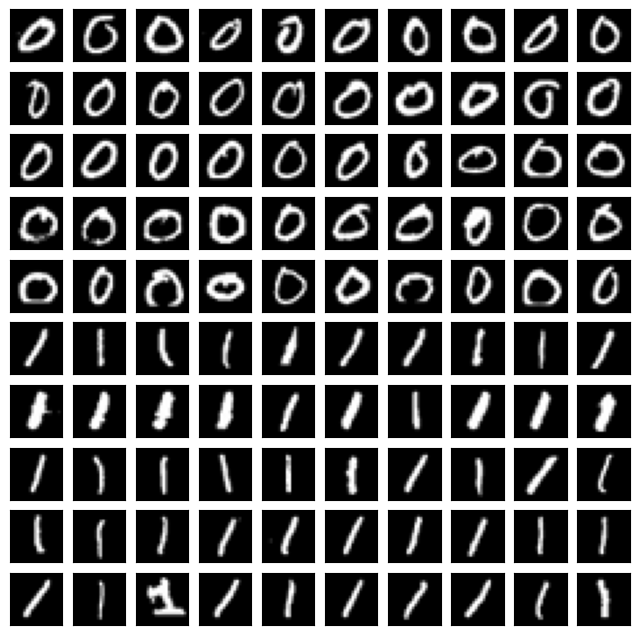

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

SZ = 20  # size of each digit is SZ x SZ
bin_n = 16  # Number of bins
affine_flags = cv.WARP_INVERSE_MAP | cv.INTER_LINEAR

img = cv.imread('data/digits.png', 0)
assert img is not None, 'Failed to load image file: %s' % args.input

cells = [np.hsplit(row, 100) for row in np.vsplit(img, 50)]

# First half is trainData, remaining is testData
train_cells = [i[:50] for i in cells]
test_cells = [i[50:] for i in cells]

deskewed = [list(map(deskew, row)) for row in train_cells]
hogdata = [list(map(hog, row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1, 64)
responses = np.repeat(np.arange(10), 250)[:, np.newaxis]

svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('data/svm_data.dat')

deskewed = [list(map(deskew, row)) for row in test_cells]
hogdata = [list(map(hog, row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1, bin_n * 4)
result = svm.predict(testData)[1]

mask = result == responses
correct = np.count_nonzero(mask)
print( "%d out of %d predictions correct" % (correct, result.size) )
print("Accuracy is %.2f%%" % (correct * 100.0 / result.size))

# plot images
plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(test_cells[i // 10][i % 10], cmap='gray')
    plt.xticks([])
    plt.yticks([])

## K-Means Clustering

### Understanding K-Means Clustering

#### Theory

K-Means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

##### T-shirt Size Example
Consider a company, which is going to release a new model of T-shirt to market. Obviously they will have to manufacture models in different sizes to satisfy people of all sizes. So the company make a data of people's height and weight, and plot them on to a graph, as below:

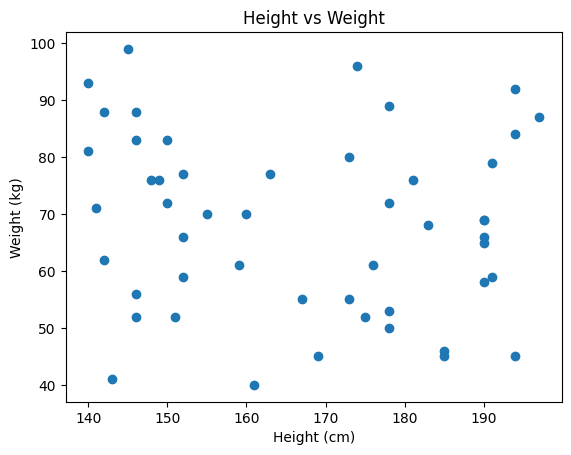

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# data of people's height and weight
height = np.random.randint(140, 200, 50)
weight = np.random.randint(40, 100, 50)


# plot the data
plt.scatter(height, weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()


Company can't create t-shirts with all the sizes. Instead, they divide people to Small, Medium and Large, and manufacture only these 3 models which will fit into all the people. This grouping of people into three groups can be done by k-means clustering, and algorithm provides us best 3 sizes, which will satisfy all the people. And if it doesn't, company can divide people to more groups, may be five, and so on. Check the graph below :

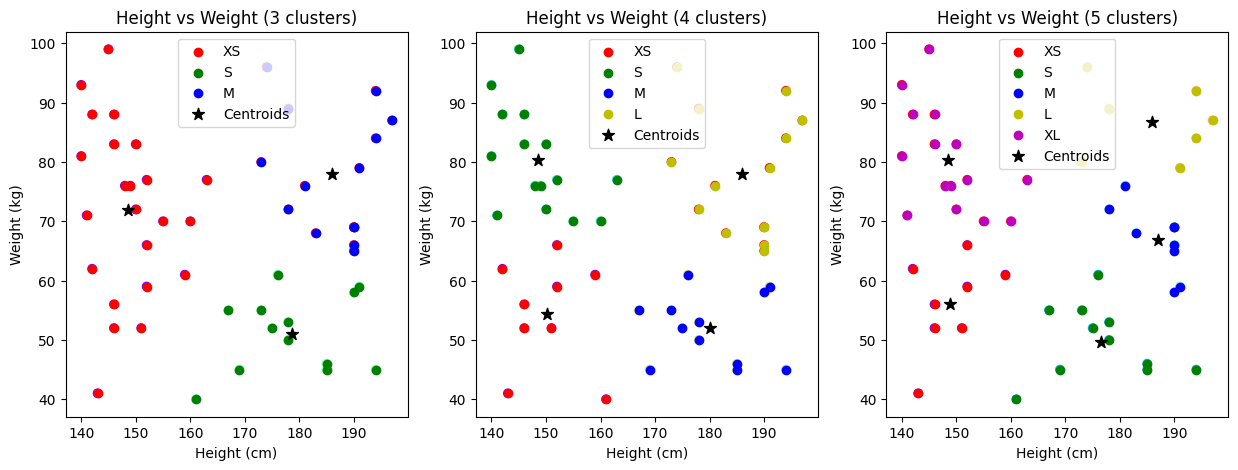

In [68]:
import cv2 as cv

Z = np.vstack((height, weight)).astype(np.float32).T

# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate([3, 4, 5]):
    # k clusters
    ret, label, center = cv.kmeans(Z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    clusters = [Z[label.ravel() == j] for j in range(k)]
    colors = ['r', 'g', 'b', 'y', 'm']
    sizes = ['XS', 'S', 'M', 'L', 'XL']
    axs[i].scatter(Z[:, 0], Z[:, 1], c=label.ravel(), cmap='rainbow')
    for j in range(k):
        axs[i].scatter(clusters[j][:, 0], clusters[j][:, 1], c=colors[j], label=f'{sizes[j]}')
    axs[i].scatter(center[:, 0], center[:, 1], s=80, c='k', marker='*', label='Centroids')
    axs[i].set_xlabel('Height (cm)')
    axs[i].set_ylabel('Weight (kg)')
    axs[i].set_title(f'Height vs Weight ({k} clusters)')
    axs[i].legend()

plt.show()


#### How does it work?

The k-means clustering algorithm mainly performs two tasks:

**Step : 1** - Algorithm randomly chooses two centroids, C1 and C2 (sometimes, any two data are taken as the centroids).

**Step : 2** - It calculates the distance from each point to both centroids. If a test data is more closer to C1, then that data is labelled with '0'. If it is closer to C2, then labelled as '1' (If more centroids are there, labelled as '2','3' etc).

**Step : 3** - Now, we have to re-calculate the centroids. We find the average of all the points labelled as '0' and assign the centroid C1 to that point. Similarly, we find the average of all the points labelled as '1' and assign the centroid C2 to that point.

**Step : 4** - Repeat the steps 2 and 3 until the centroids doesn't change.

##### How to choose the value of k?

The performance of k-means clustering algorithm depends upon the value of k. So, how to choose the value of k? There is no definitive answer to this question, it depends upon the dataset and the goal of the person.

### K-Means Clustering in OpenCV

#### Goal

In this section, we will see how to use k-means clustering for image segmentation.

#### Understanding Parameters

Before going to code, let's understand the parameters which we will use in the code.

##### Input Parameters

1 . **samples** : It should be of np.float32 data type, and each feature should be put in a single column.

2 . **nclusters(K)** : Number of clusters required at end

3 . **criteria** : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are ( type, max_iter, epsilon ):

- **type** of termination criteria. It has 3 flags as below:

    - **cv.TERM_CRITERIA_EPS** - stop the algorithm iteration if specified accuracy, epsilon, is reached.
    - **cv.TERM_CRITERIA_MAX_ITER** - stop the algorithm after the specified number of iterations, max_iter.
    - **cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER** - stop the iteration when any of the above condition is met.

- **max_iter** - An integer specifying maximum number of iterations.
- **epsilon** - Required accuracy

4 . **attempt** : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5 . **flags** : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

##### Output Parameters

1 . **compactness** : It is the sum of squared distance from each point to their corresponding centers.

2 . **labels** : This is the label array (same as 'code' in previous article) where each element marked '0', '1'.....

3 . **centers** : This is array of centers of clusters.

#### Data with only one feature

Consider you have a ser of data with only one feature, ie 1D data. For example, we can take our t-shirt example above. Here we have only one feature, ie height of the person. So we can plot the data on a line. We can easily see that there are three clusters. So we can apply k-means clustering with k=3. Check the image below:




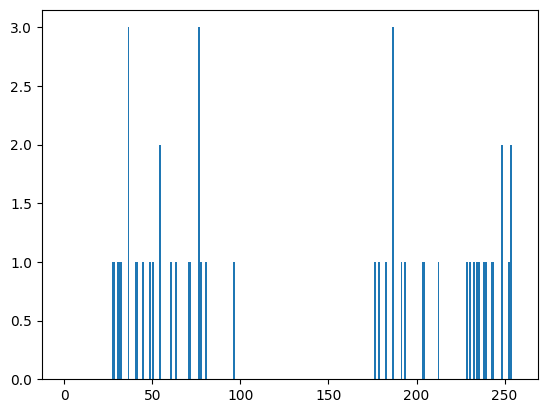

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(25, 100, 25)
y = np.random.randint(175, 255, 25)
z = np.hstack((x, y))
z = z.reshape((50, 1))
z = np.float32(z)
plt.hist(z, 256, [0, 256]), plt.show()
plt.show()

so we have `z` which is an array of size 50 and valus ranging from 0 to 255. We need to convert it to np.float32 type and reshape it to a column vector.

Next we need to define the criteria. Here we use `cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER` which means that the iteration will stop when either the accuracy epsilon or maximum iterations are reached, whichever comes first. It has also specified the maximum number of iterations as 10 and epsilon as 1.0. So after 10 iterations, it will stop.

In [72]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness, labels, centers = cv.kmeans(z, 2, None, criteria, 10, flags)
print(centers)

[[218.87999]
 [ 53.28   ]]


We get compactness, labels and centers. Labels will have the same size as that of test data where each data will be labelled as 0,1,2 etc. depending on their centroids. Now we split the data to different clusters depending on their labels.

In [73]:
A = z[labels == 0]
B = z[labels == 1]

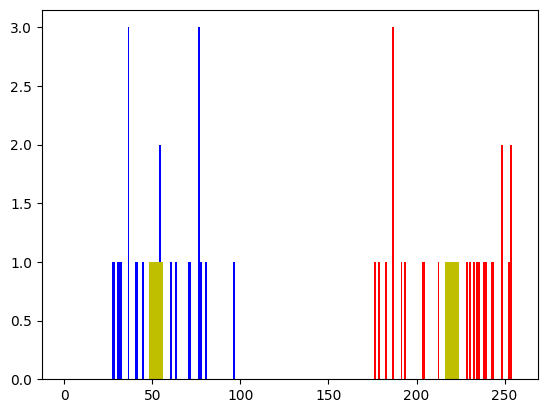

In [74]:
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A, 256, [0, 256], color='r')
plt.hist(B, 256, [0, 256], color='b')
plt.hist(centers, 32, [0, 256], color='y')
plt.show()

#### Data with multiple features

In previous example, we took only height of the person as the feature. Now we will take both height and weight into account. So we have a 2D data. We can plot it on a plane.

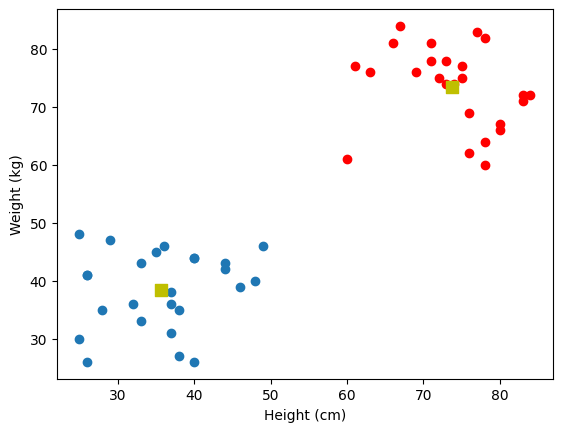

In [75]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randint(25, 50, (25, 2))
Y = np.random.randint(60, 85, (25, 2))
Z = np.vstack((X, Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# set flags (just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS

# apply kmeans
compactness, labels, centers = cv.kmeans(Z, 2, None, criteria, 10, flags)

# Now separate the data, Note the flatten()
A = Z[labels.ravel() == 0]
B = Z[labels.ravel() == 1]

# Plot the data
plt.scatter(A[:, 0], A[:, 1])
plt.scatter(B[:, 0], B[:, 1], c='r')
plt.scatter(centers[:, 0], centers[:, 1], s=80, c='y', marker='s')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Color Quantization

Color Quantization is the process of reducing number of colors in an image. One reason to do so is to reduce the memory. Sometimes, some devices may have limitation such that it can produce only limited number of colors. In those cases also, color quantization is performed. Here we use k-means clustering for color quantization.

There is nothing new to be explained here. There are 3 features, say, R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image). And after the clustering, we apply centroid values (it is also R,G,B) to all pixels, such that resulting image will have specified number of colors. And again we need to reshape it back to the shape of original image. Below is the code:

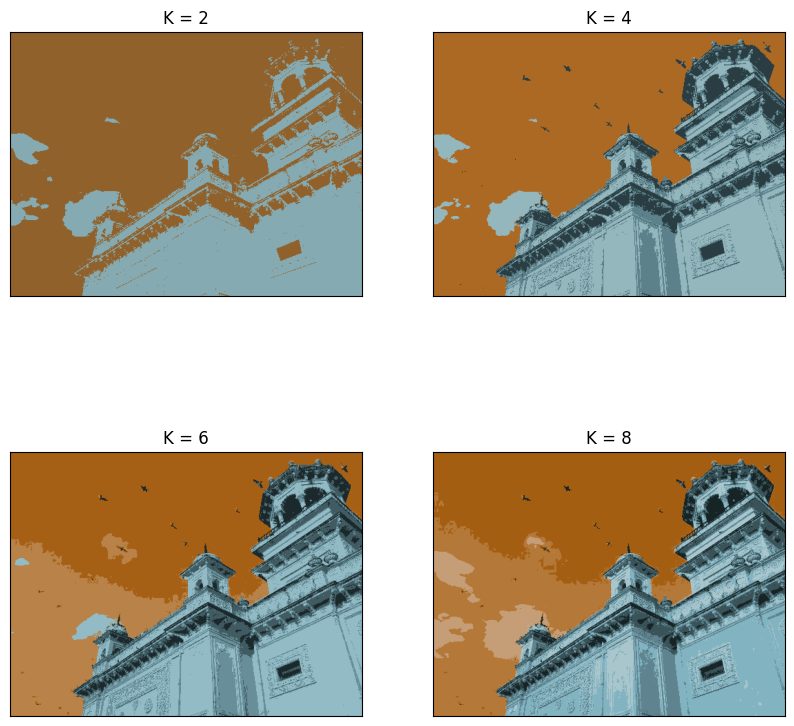

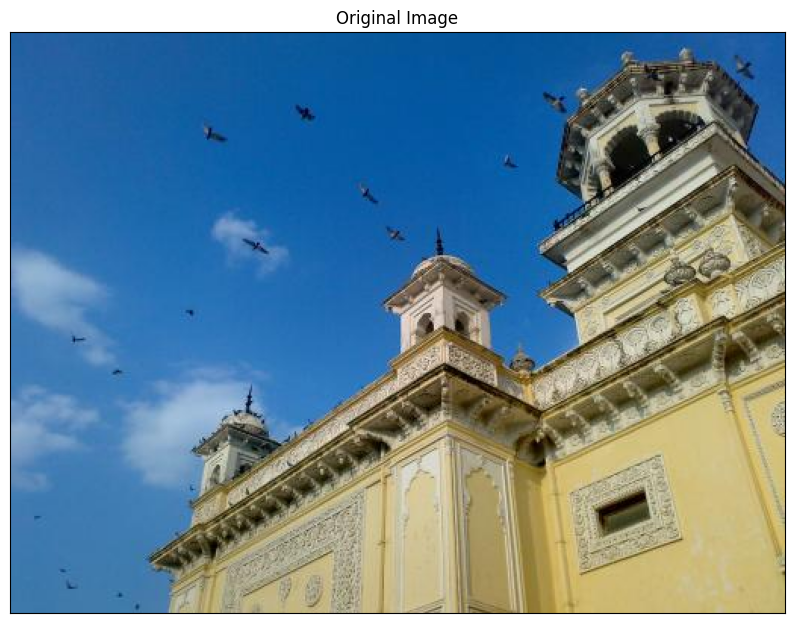

In [83]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('data/home.jpg')
z = img.reshape((-1, 3))

# convert to np.float32
z = np.float32(z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = [2, 4, 6, 8]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, k in enumerate(K):
    _, label, center = cv.kmeans(z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    axs[i // 2, i % 2].imshow(res2)
    axs[i // 2, i % 2].set_title(f'K = {k}')
    axs[i // 2, i % 2].set_xticks([])
    axs[i // 2, i % 2].set_yticks([])

# plot original image
plt.figure(figsize=(10, 10))
plt.imshow(img[:, :, ::-1])
plt.title('Original Image')
plt.xticks([])
plt.yticks([])
plt.show()  